In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Funcion para crear los datos

In [2]:
def random_value_from_intervals(a, b):
    if np.random.rand() < 0.5:
        return np.random.uniform(-a, -b)
    else:
        return np.random.uniform(a, b)


def get_data(n_points):
    m = random_value_from_intervals(50,100)
    xlim = 10/m

    x = np.linspace(-xlim, xlim,n_points)
    y = m*x
    x = x + np.random.normal(0, abs(xlim) ,n_points)

    x = np.concatenate([x, np.random.uniform(-10,10,n_points)])
    y = np.concatenate([y, np.random.uniform(-10,10,n_points)])

    return x, y

def get_wrong_data(n_points):
    x = np.random.uniform(-10,10,n_points)
    y = np.random.uniform(-10,10,n_points)
    return x, y

## Crear toda la database

In [3]:
np.random.seed(0)
porcentaje_malas = .2
n_pruebas = 100
n_pruebas_malas = round(porcentaje_malas * n_pruebas)
n_pruebas_buenas = n_pruebas - n_pruebas_malas

funciones = [get_data] * n_pruebas_buenas + [get_wrong_data] * n_pruebas_malas

random.shuffle(funciones)

data_points = []
data_NOK = []
for funcion in funciones:
    if funcion.__name__=='get_data':
        data_points.append(np.column_stack(get_data(500)))
        data_NOK.append('OK')
    else:
        data_points.append(np.column_stack(get_wrong_data(1000)))
        data_NOK.append('NOK')

data_points = np.array(data_points)
print(f'Número de imagenes creadas: {n_pruebas}')

Número de imagenes creadas: 100


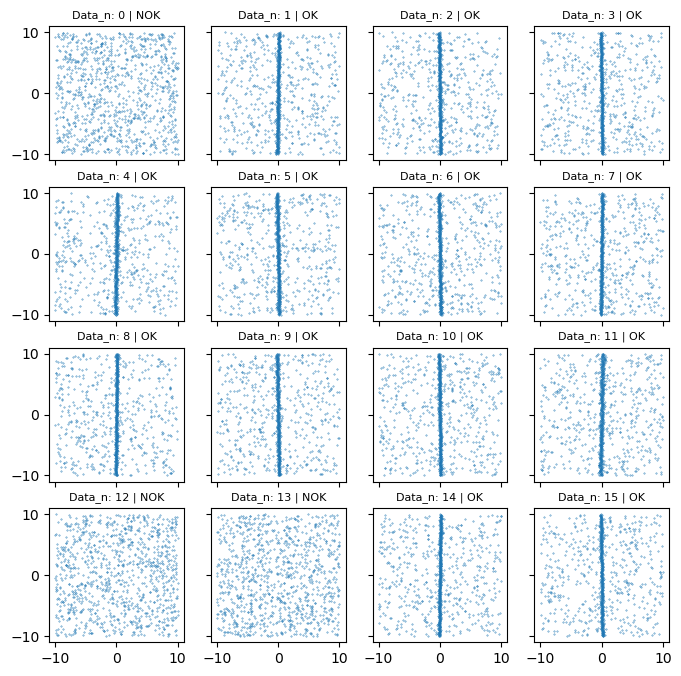

In [4]:
f, axs = plt.subplots(4,4, figsize=(8,8), sharex=True, sharey=True)
for n, ax in enumerate(axs.flatten()):
    ax.scatter(data_points[n][:,0], data_points[n][:,1], s = .1)
    ax.set_title(f'Data_n: {n} | {data_NOK[n]}', fontsize=8)
plt.show()

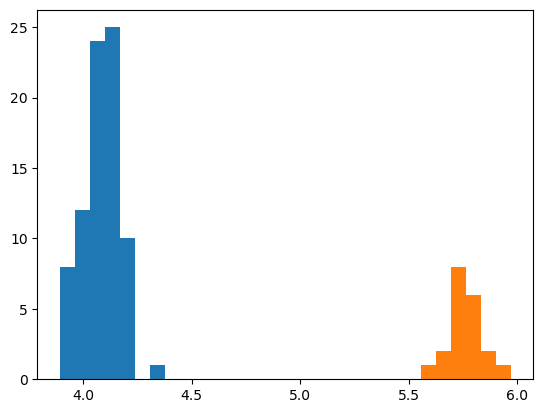

In [5]:
data_points_stds = data_points[:, :, 0].std(1)
indices_ok = [indice for indice, valor in enumerate(data_NOK) if valor == 'OK']
indices_nok = [indice for indice, valor in enumerate(data_NOK) if valor == 'NOK']

valores_ok = data_points_stds[indices_ok]
valores_nok = data_points_stds[indices_nok]

plt.hist([valores_ok,valores_nok],bins =30, stacked=True)
plt.show()


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data_points_stds.reshape(-1, 1)
y = np.array(data_NOK)
y_binary = np.where(y == 'OK', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


In [8]:
def imagen_buena_o_mala(imagen):
    res = model.predict(imagen[:,0].std().reshape(-1, 1))
    if res.item() == 0:
            print("Buena")
    else:
        print("Mala")

imagen_buena_o_mala(np.column_stack(get_data(500)))
imagen_buena_o_mala(np.column_stack(get_wrong_data(1000)))

Buena
Mala
